# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

# Discrete distributions
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import poisson

# Continous distributions
from scipy.stats import uniform
from scipy.stats import expon
from scipy.stats import norm

## Uniform Distribution

#### Recap: The uniform distribution is rectangular-shaped, which means every value in the distribution is equally likely to occur.

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [2]:
from scipy.stats import uniform
x = uniform.rvs(size=10)

a = 2
b = 3

randoms  = a + (b-a)*x
print(randoms)

[2.86470896 2.93390165 2.3364149  2.30513217 2.86933953 2.42948316
 2.11974193 2.21404838 2.65966917 2.99670628]


In [7]:
bottom = randoms.min()
bottom

2.1197419331731386

In [8]:
ceiling = randoms.max()
ceiling

2.9967062826543445

In [9]:
count = len(randoms)
count

10

**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [52]:
# The uniform distribution formula is:
# x = np.linspace(a, b-a, count)

## Create a generic function which considers the 3 parameters, bottom, ceiling and count, and which returns the x_values

def uniform_dist(bottom, ceiling, count):

    # a is our bottom
    # b is our ceiling
    # count is count

    uniform_dist = uniform(bottom, ceiling-bottom)
    x_values = uniform_dist.rvs(count)

    return(x_values)

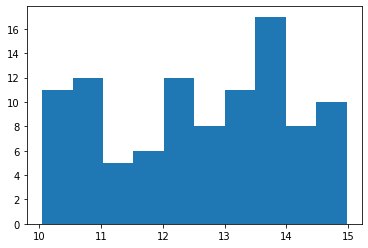

In [53]:
# Return the function 'uniform_dist' with bottom=10, ceiling=50, count=100

uniform_dist_1 = uniform_dist(10, 15, 100)
uniform_dist_1

plt.hist(uniform_dist_1)
plt.show()

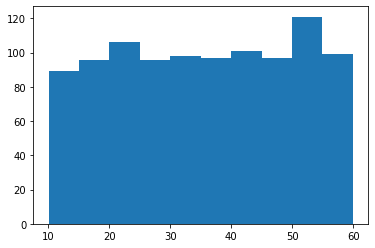

In [54]:
# Return the function 'uniform_dist' with bottom=10, ceiling=60, count=1000

uniform_dist_2 = uniform_dist(10, 60, 1000)
uniform_dist_2

plt.hist(uniform_dist_2)
plt.show()

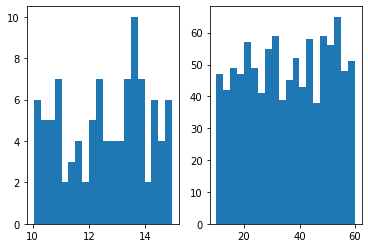

In [57]:
# Create a subplot of 2 columns and 1 row in order to plot 2 charts 

fig,ax = plt.subplots(ncols=2)

x = uniform_dist_1
ax[0].hist(x, bins=20)

y = uniform_dist_2
ax[1].hist(y, bins=20)

plt.show()

How are the two distributions different?

#### Comments: 

- The uniform distribution is used to model scenarios where each potential outcome is equally likely. 
- A classic example is rolling a die. If you roll a die one time, the probability that it falls on a number between 1 and 6 follows a uniform distribution because each number is equally likely to occur.
- Therefore, the probability that either scenarios or variables occur is equally likely. 

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

### Recap:
Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean.

In [20]:
# The normal distribution formula is:
# x = mu + sigma * count

def normal_random(mu, sigma, count):

    # mu is our mean
    # sigma is our standard deviation
    # count is our count

    x = mu + sigma * np.random.randn(count)
    return x


In [21]:
# Return the function 'normal_random' with mu=10, sigma=1, count=1000
normal_random(10, 1, 1000)

array([10.16259447,  8.79774525, 10.67094391,  8.58154202,  9.97951727,
        7.90095747, 11.60361898,  9.81627574, 11.39774943, 10.19084025,
        9.02788738,  8.49425528,  9.62995251, 10.26129293,  8.21479748,
       11.21630174,  9.80849921, 10.21393088, 10.41925407,  9.5364238 ,
       10.30276801, 11.47736946,  9.90910915,  9.33055726,  9.3691366 ,
       10.78945661,  9.17174104, 11.32672316, 10.8311606 ,  9.75807625,
       11.92410942,  9.61223575,  9.94831872, 12.18827213, 10.91801564,
       10.20995593, 10.42913565, 11.45843563, 10.70640083, 10.84142713,
       10.35835438,  9.48904381,  9.11529704,  9.8132045 ,  8.92269507,
        9.48815056,  9.52070987,  9.25876246, 10.75100323,  8.76381434,
       10.20679342,  9.31798016,  8.40636908, 10.36582599,  8.34673311,
       10.84334985, 11.58929829,  9.89635492,  9.90418384,  9.09453026,
        9.24588968, 10.43475071,  9.54072598,  9.65946716,  9.84166344,
       11.1119317 , 11.61615031, 10.73296944, 11.74683482, 10.48

In [112]:
normal_random(10,1,1000).mean()

10.036492441867068

In [121]:
# Return the function 'normal_random' with mu=10, sigma=50, count=1000

normal_random(10, 50, 1000)

array([  93.7041812 ,  -35.4555796 ,    6.12107966,   43.58802893,
        -21.09429118,   -6.23515335,  -37.91540466,  -33.68920747,
         30.20344814,    5.84415518,   31.48271631,  -20.30944547,
         67.02651921,  126.35552326,   46.08065441,  -13.24235982,
          3.62160498,   15.32758976,  112.59087717,   31.46778174,
         15.96724289,   78.11457623,   38.70030126,   71.62295615,
         34.37032815,   56.51029023,  -47.86872807,   40.84922537,
         24.52268626, -123.6785423 ,    3.96037084,   10.36245844,
        -59.6929672 ,   -8.37956948,  -14.03426028,    6.11259912,
        -17.2623052 ,   19.23874267,   56.56052043,  -46.59090205,
        -52.28364798,   50.42505253,   -9.73697133,    1.15326829,
        -97.7657525 ,   -8.41334058,   26.78479096,  -23.94826841,
         81.22535525,   20.66098983,  -11.35733546,   42.53816531,
        -18.80405313,  -24.22770823,   64.07714815,   24.18810966,
         51.92231163,  -17.8619248 ,  -89.49235633,   21.78426

In [122]:
normal_random(10,5,1000).mean()


10.047035165285001

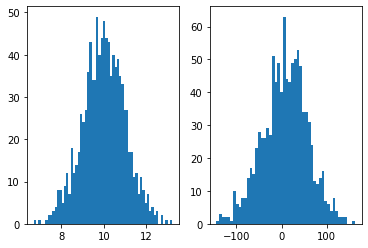

In [39]:
# Create a subplot of 2 columns and 1 row in order to plot 2 charts 

fig,ax = plt.subplots(ncols=2)

x = normal_random(10, 1, 1000)
ax[0].hist(x, bins=60)

y = normal_random(10, 50, 1000)
ax[1].hist(y, bins=50)

plt.show()


How are the two distributions different?

### Comments

When comparing histograms 1 and 2, we clearly see that the values of subplot a are more concentrated around the mean in the case of normal random, visualizaton 1 --> x = normal_random(10, 1, 1000)

When looking histogram 2, we see that there are more ouliers. 

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

In [59]:
#Read the csv file, and return a dataframe

vehicles = pd.read_csv('/Users/GiadaSartori/Documents/IRONHACK/Lab/Week5/lab-probability-distributions/your-code/vehicles.csv')
vehicles.head(10)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
5,Acura,2.2CL/3.0CL,1997,2.2,4.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,14.982273,20,26,22,403.954545,1500
6,Acura,2.2CL/3.0CL,1997,2.2,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,13.733750,22,28,24,370.291667,1400
7,Acura,2.2CL/3.0CL,1997,3.0,6.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,16.480500,18,26,20,444.350000,1650
8,Acura,2.3CL/3.0CL,1998,2.3,4.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,14.982273,19,27,22,403.954545,1500
9,Acura,2.3CL/3.0CL,1998,2.3,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,13.733750,21,29,24,370.291667,1400


In [71]:
#Quickly analyze the dataframe vehicles

columns = vehicles.columns
columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

In [72]:
len(columns)

15

Then plot the histograms for the following variables:

1. Fuel Barrels/Year

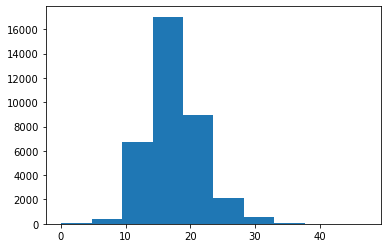

In [73]:
plt.hist(vehicles['Fuel Barrels/Year'])
plt.show()


2. CO2 Emission Grams/Mile 

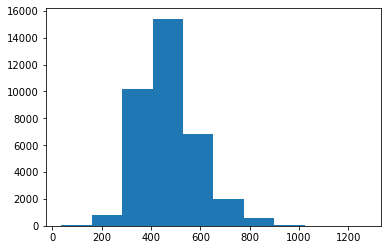

In [74]:
plt.hist(vehicles['CO2 Emission Grams/Mile'])
plt.show()


3. Combined MPG

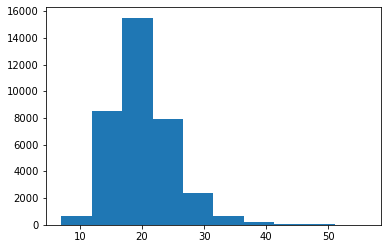

In [69]:
plt.hist(vehicles['Combined MPG'])
plt.show()


Which one(s) of the variables are nearly normally distributed? How do you know?

##### Normal Distribution or Gaussian Distribution

###### Definition:
It is the most common distribution function for independent, randomly generated variables. 
It is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. 

###### Key characteristics:
1) Symmetric
2) Unimodal
3) Asymptotic
4) Mean, median, and mode are all equal

In [84]:
## 1. Fuel Barels / Year
# Compute the media, the median and the mode

vehicles['Fuel Barrels/Year'].mean()

17.609055502328875

In [83]:
vehicles['Fuel Barrels/Year'].median()

17.347894736842107

In [85]:
vehicles['Fuel Barrels/Year'].mode()

0    18.311667
Name: Fuel Barrels/Year, dtype: float64

In [80]:
# Check if the mean, the median and the mode of Fuel Barrels Year are equal or not

vehicles['Fuel Barrels/Year'].mean() == vehicles['Fuel Barrels/Year'].median() == vehicles['Fuel Barrels/Year'].mode()

False

In [86]:
## 2. CO2 Emission Grams/Mile:
## Compute the media, the median and the mode

vehicles['CO2 Emission Grams/Mile'].mean()

475.31633925715045

In [87]:
vehicles['CO2 Emission Grams/Mile'].median()

467.7368421052632

In [88]:
vehicles['CO2 Emission Grams/Mile'].mode()

0    493.722222
Name: CO2 Emission Grams/Mile, dtype: float64

In [ ]:
vehicles['CO2 Emission Grams/Mile'].mean() == vehicles['CO2 Emission Grams/Mile'].median() == vehicles['CO2 Emission Grams/Mile'].mode()

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

### Recap:

The exponential distribution graph is a graph of the probability density function which shows the distribution of distance or time taken between events.

In [101]:
# Use numpy.random.exponential() to return a list of numbers exponentially distributed with the mean of 10

np.random.exponential(10, 5)

array([ 6.93439326, 15.42604549,  3.13267684,  2.94590754,  1.74760255])

Consider np.random.exponential(mean,size) with parameters:
- scale: float or array, which in our case is the mean
- size: size of our array or list of numbers

In [98]:
# Define a generic function to get a list of numbers exponentially distributed with the mean of 1 and 100

def exponential_random(mean, size):

    # mean is either 1 or 100
    # size is the number of the sample

    exp_random = np.random.exponential(mean, size)
    return exp_random

In [96]:
# Use the generic function to generate a list of numbers with mean 1 and size 1000

exp_random1 = exponential_random(1, 1000)
exp_random1

array([1.21146953e+00, 1.39966172e+00, 6.75374886e-01, 1.78018951e-01,
       2.46399912e-03, 2.37971747e-01, 1.57498106e+00, 2.78470744e+00,
       1.09669041e+00, 2.38639224e-01, 1.43698769e+00, 6.43364811e-02,
       9.92532154e-01, 3.22907970e-01, 2.95268395e-01, 6.08540314e-01,
       1.79029265e+00, 2.47031629e+00, 2.79189400e+00, 2.93815654e+00,
       8.00001913e-01, 2.41280544e-01, 6.81054773e-01, 2.08784995e+00,
       7.12947426e-01, 9.96323758e-01, 2.12237101e+00, 3.06643203e-01,
       1.59379780e+00, 2.34828773e-01, 1.05465136e-01, 9.57148567e-01,
       5.56159346e-01, 3.12550532e-01, 5.39571446e-01, 1.22959123e+00,
       1.33621334e+00, 2.02068177e+00, 9.04056530e-01, 2.89167624e+00,
       5.21849323e-01, 3.11721792e-01, 3.08680212e+00, 9.17575701e-01,
       4.45615091e-01, 7.10376426e-01, 9.46729269e-02, 1.98426343e-01,
       8.66440134e-01, 8.79760832e-01, 1.55640784e-01, 8.52130409e-01,
       1.41039047e-01, 3.06502128e-01, 3.32227865e-01, 1.23129991e+00,
      

In [97]:
# Use the generic function to generate a list of numbers with mean 100 and size 1000

exp_random2 = exponential_random(100, 1000)
exp_random2

array([1.47728297e+02, 3.37236058e+01, 1.75832985e+02, 4.59500650e+01,
       9.15121746e+01, 1.11710232e+02, 2.74281422e+01, 1.08947914e+02,
       1.43262965e+02, 2.50058097e+01, 1.89907001e+01, 1.26922803e+02,
       4.63728609e+01, 4.53738381e+01, 1.56283722e+01, 1.00746868e+02,
       1.24434164e+02, 1.58058271e+02, 3.48022947e+01, 2.42246409e+01,
       1.17909989e+01, 4.29147138e+01, 1.88550626e+01, 6.95676405e+01,
       1.52431155e+01, 7.18444755e+01, 9.77779767e+00, 7.72171940e+00,
       2.95061876e+01, 3.57479092e+02, 1.25508781e+01, 1.27602255e+02,
       1.57104858e+02, 9.07072579e+01, 2.65203876e+02, 2.05100910e+02,
       1.19842671e+02, 1.91851020e+02, 1.14087816e+02, 2.84174575e+01,
       1.69756059e+02, 4.18551550e+01, 6.29325879e+00, 1.50429556e+00,
       2.09467036e+02, 7.70003435e+01, 6.16563480e+01, 2.05104474e+02,
       1.25233270e+02, 1.16602707e+02, 6.91681314e+01, 1.38096894e+02,
       8.55360291e+01, 4.36273217e+01, 7.11302237e+01, 6.63337491e+01,
      

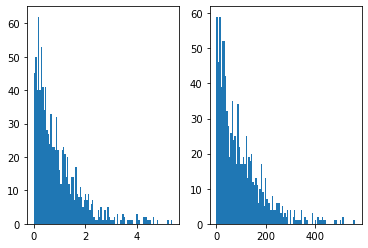

In [102]:
# Create a subplot of 2 columns and 1 row in order to plot 2 charts 

fig,ax = plt.subplots(ncols=2)

x = exponential_random(1, 1000)
ax[0].hist(x, bins=100)

y = exponential_random(100, 1000)
ax[1].hist(y, bins=100)

plt.show()

How are the two distributions different?

In [ ]:
# your answer here:


## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [ ]:
# your answer here
# Hint: This is same as saying P(x<15)


In [108]:
from scipy.stats import expon

# rate = 1/10

lambda_inv = 10/1 # how much time on average, IN MINUTES, it needs to pass until a client leaves a bank

In [110]:
exp_dist = expon(scale = lambda_inv)

print(exp_dist.cdf(14)) # cdf is inclusive

0.7534030360583935


What is the probability that the customer will spend more than 15 minutes

In [111]:
print(exp_dist.sf(15)) # sf is exclusive 

print(1 - exp_dist.cdf(15))


0.22313016014842982
0.2231301601484298


We want to figure out with the pdf what is the value (which is in between 0.50 and 0.95), or time invested in a bank before leaving, to recommend to our users when going to a bank
- Risk avoidance = higher probability with pdf, e.g., 90%, 95%
- Risk willingness = lower probabilitu with pdf, e.g., 50%, 60%

In [123]:
exp_dist.ppf(0.90) #The result says that our client is 90% likely to wait more than 23 minutes before s/he can leave the bank

23.02585092994046

In [124]:
exp_dist.ppf(0.50) #The result says that our client is 50% likely to wait almost 7 minutes before s/he can leave the bank

6.931471805599453